## What is Deep Learning?

- Deep learning algorithms seek to exploit the unknown structure in the input distribution in order to discover good representations, often at multiple levels, with higher-level learned features defined in terms of lower-level features

- Deep learning methods aim at learning feature hierarchies with features from higher levels of the hierarchy formed by the composition of lower level features. Automatically learning features at multiple levels of abstraction allow a system to learn complex functions mapping the input to the output directly from data, without depending completely on human-crafted features.

- The hierarchy of concepts allows the computer to learn complicated concepts by building them out of simpler ones. If we draw a graph showing how these concepts are built on top of each other, the graph is deep, with many layers. For this reason, we call this approach to AI deep learning.

- Deep-learning methods are representation-learning methods with multiple levels of representation, obtained by composing simple but non-linear modules that each transform the representation at one level (starting with the raw input) into a representation at a higher, slightly more abstract level. […] The key aspect of deep learning is that these layers of features are not designed by human engineers: they are learned from data using a general-purpose learning procedure.


## Introduction to the Python Deep Learning Library Theano

- Theano is a Python library for fast numerical computation that can be run on the CPU or GPU.

- It is a key foundational library for Deep Learning in Python that you can use directly to create Deep Learning models or wrapper libraries that greatly simplify the process.

- At it’s heart Theano is a compiler for mathematical expressions in Python. It knows how to take your structures and turn them into very efficient code that uses NumPy, efficient native libraries like BLAS and native code (C++) to run as fast as possible on CPUs or GPUs.

- The actual syntax of Theano expressions is symbolic, which can be off putting to beginners used to normal software development. Specifically, expression are defined in the abstract sense, compiled and later actually used to make calculations.

- It was specifically designed to handle the types of computation required for large neural network algorithms used in Deep Learning. It was one of the first libraries of its kind (development started in 2007) and is considered an industry standard for Deep Learning research and development.

- In this section we demonstrate a simple Python script that gives you a flavor of Theano.

- It is taken from the Theano at a Glance guide. In this example we define two symbolic floating point variables a and b.

- We define an expression that uses these variables (c = a + b).

- We then compile this symbolic expression into a function using Theano that we can use later.

- Finally, we use our complied expression by plugging in some real values and performing the calculation using efficient compiled Theano code under the covers.

In [ ]:
import theano
from theano import tensor
# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()
# create a simple expression
c = a + b
# convert the expression into a callable object that takes (a,b)
# values as input and computes a value for c
f = theano.function([a,b], c)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
assert 4.0 == f(1.5, 2.5)

- If you are new to deep learning you do not have to use Theano directly.

- In fact, you are highly encouraged to use one of many popular Python projects that make Theano a lot easier to use for deep learning like Lasagne library and Keras

-  Kerashides Theano completely and provides a very simple API to work with to create Deep Learning models. It hides Theano so well, that it can in fact run as a wrapper for another popular foundation framework called TensorFlow.

### Introduction to the Python Deep Learning Library TensorFlow

- TensorFlow is a Python library for fast numerical computing created and released by Google.

- It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

- Unlike other numerical libraries intended for use in Deep Learning like Theano, TensorFlow was designed for use both in research and development and in production systems

- It can run on single CPU systems and GPUs, as well as mobile devices and large-scale distributed systems of hundreds of machines

- Computation is described in terms of data flow and operations in the structure of a directed graph.

    - Nodes: Nodes perform computation and have zero or more inputs and outputs. Data that moves between nodes are known as tensors, which are multi-dimensional arrays of real values.
    - Edges: The graph defines the flow of data, branching, looping, and updates to state. Special edges can be used to synchronize behavior within the graph, for example, waiting for computation on a number of inputs to complete.
    - Operation: An operation is a named abstract computation that can take input attributes and produce output attributes. For example, you could define an add or multiply operation.

-  first example shows how you can define values as tensors and execute an operation.

In [4]:
import tensorflow as tf
a = tf.constant(10)
b = tf.constant(32)
print(a+b)

tf.Tensor(42, shape=(), dtype=int32)


- This example shows how you can define variables (e.g., W and b) as well as variables that are the result of the computation (y).

- We get some sense that TensorFlow separates the definition and declaration of the computation. 

- Below, there is automatic differentiation under the hood. When we use the function mse_loss() to compute the difference between y and y_data, there is a graph created connecting the value produced by the function to the TensorFlow variables W and b. 

- TensorFlow uses this graph to deduce how to update the variables inside the minimize() function.

In [6]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

# A function to compute mean squared error between y_data and computed y
def mse_loss():
    y = W * x_data + b
    loss = tf.reduce_mean(tf.square(y - y_data))
    return loss

# Minimize the mean squared errors.
optimizer = tf.keras.optimizers.Adam()
for step in range(2000):
    optimizer.minimize(mse_loss, var_list=[W,b])
    if step % 500 == 0:
        print(step, W.numpy(), b.numpy())

# Learns best fit is W: [0.1], b: [0.3]

0 [-0.5232843] [0.00099999]
500 [-0.17262588] [0.33810946]
1000 [-0.06886737] [0.39102742]
1500 [-0.02253548] [0.37006834]


### Introduction to Python Deep Learning with Keras

- Two of the top numerical platforms in Python that provide the basis for Deep Learning research and development are Theano and TensorFlow.

- Both are very powerful libraries, but both can be difficult to use directly for creating deep learning models.

-  Keras Python library provides a clean and convenient way to create a range of deep learning models on top of Theano or TensorFlow.

- Keras is a minimalist Python library for deep learning that can run on top of Theano or TensorFlow.

- It was developed to make implementing deep learning models as fast and easy as possible for research and development.

Keras was developed and maintained by François Chollet, a Google engineer using four guiding principles:

    - Modularity: A model can be understood as a sequence or a graph alone. All the concerns of a deep learning model are discrete components that can be combined in arbitrary ways.
    - Minimalism: The library provides just enough to achieve an outcome, no frills and maximizing readability.
    - Extensibility: New components are intentionally easy to add and use within the framework, intended for researchers to trial and explore new ideas.
    - Python: No separate model files with custom file formats. Everything is native Python.

- Keras is relatively straightforward to install if you already have a working Python and SciPy environment.

- You must also have an installation of Theano or TensorFlow on your system already.

- Assuming you have both Theano and TensorFlow installed, you can configure the backend used by Keras.

- The focus of Keras is the idea of a model.

- The main type of model is called a Sequence which is a linear stack of layers.

- You create a sequence and add layers to it in the order that you wish for the computation to be performed.

- Once defined, you compile the model which makes use of the underlying framework to optimize the computation to be performed by your model. In this you can specify the loss function and the optimizer to be used.

- Once compiled, the model must be fit to data. This can be done one batch of data at a time or by firing off the entire model training regime. This is where all the compute happens.

- Once trained, you can use your model to make predictions on new data.

- We can summarize the construction of deep learning models in Keras as follows:

    - Define your model. Create a sequence and add layers.
    - Compile your model. Specify loss functions and optimizers.
    - Fit your model. Execute the model using data.
    - Make predictions. Use the model to generate predictions on new data.


### Your First Deep Learning Project in Python with Keras Step-by-Step

- Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- It is part of the TensorFlow library and allows you to define and train neural network models in just a few lines of code.

- The steps are as follows:
    - Load Data
    - Define Keras Model
    - Compile Keras Model
    - Fit Keras Model
    - Evaluate Keras Model
    - Make Predictions
    
## 1. Load Data

- The first step is to define the functions and classes you intend to use in this tutorial.

- You will use the NumPy library to load your dataset and two classes from the Keras library to define your model.

- The imports required are listed below.


In [8]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- In this Keras tutorial, you will use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

- As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. 

- You can now load the file as a matrix of numbers using the NumPy function loadtxt().

- There are eight input variables and one output variable (the last column). You will be learning a model to map rows of input variables (X) to an output variable (y), which is often summarized as y = f(X).

- Once the CSV file is loaded into memory, you can split the columns of data into input and output variables.

- The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g., [rows, columns].

In [9]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]


## 2. Define Keras Model

- Models in Keras are defined as a sequence of layers.

- We create a Sequential model and add layers one at a time until we are happy with our network architecture.

- The first thing to get right is to ensure the input layer has the correct number of input features. This can be specified when creating the first layer with the input_shape argument and setting it to (8,) for presenting the eight input variables as a vector.

- how do we know the number of layers and their types?

- This is a tricky question. There are heuristics that you can use, and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

- In this example, let’s use a fully-connected network structure with three layers.

- Fully connected layers are defined using the Dense class. You can specify the number of neurons or nodes in the layer as the first argument and the activation function using the activation argument.

- Also, you will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

- It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. 

- Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

- You can piece it all together by adding each layer:

    - The model expects rows of data with 8 variables (the input_shape=(8,) argument).
    - The first hidden layer has 12 nodes and uses the relu activation function.
    - The second hidden layer has 8 nodes and uses the relu activation function.
    - The output layer has one node and uses the sigmoid activation function.


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


- The most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing two things, defining the input or visible layer and the first hidden layer.

### 3. Compile Keras Model

- Now that the model is defined, you can compile it.

- Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU, GPU, or even distributed.

- When compiling, you must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in your dataset.

- You must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network, and any optional metrics you want to collect and report during training.

- In this case, use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### You have defined your model and compiled it to get ready for efficient computation.

- Now it is time to execute the model on some data.

- You can train or fit your model on your loaded data by calling the fit() function on the model.

- Training occurs over epochs, and each epoch is split into batches.

    - Epoch: One pass through all of the rows in the training dataset
    - Batch: One or more samples considered by the model within an epoch before weights are updated

- One epoch comprises one or more batches, based on the chosen batch size, and the model is fit for many epochs.

- This problem will run for a small number of epochs (150) and use a relatively small batch size of 10.

- These configurations can be chosen experimentally by trial and error. You want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification.

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)


### 5. Evaluate Keras Model

- You have trained our neural network on the entire dataset, and you can evaluate the performance of the network on the same dataset.

- This will only give you an idea of how well you have modeled the dataset (e.g., train accuracy), but no idea of how well the algorithm might perform on new data. This was done for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

- You can evaluate your model on your training dataset using the evaluate() function and pass it the same input and output used to train the model.

- This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

- The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset, and the second will be the accuracy of the model on the dataset. You are only interested in reporting the accuracy so ignore the loss value.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

- Ideally, you would like the loss to go to zero and the accuracy to go to 1.0 (e.g., 100%). This is not possible for any but the most trivial machine learning problems. Instead, you will always have some error in your model. The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset.

### 6. Make Predictions

- You can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset you have not seen before.

- Making predictions is as easy as calling the predict() function on the model. You are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. You can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [ ]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

- Alternately, you can convert the probability into 0 or 1 to predict crisp classes directly; for example:

In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

### Applied Deep Learning in Python Mini-Course

#### Use Keras Models With Scikit-Learn

- Scikit-learn excels at tasks such as evaluating model performance and optimizing model hyperparameters in just a few lines of code.

- Keras provides a wrapper class that allows you to use your deep learning models with scikit-learn. For example, an instance of KerasClassifier class in Keras can wrap your deep learning model and be used as an Estimator in scikit-learn.

- When using the KerasClassifier class, you must specify the name of a function that the class can use to define and compile your model. 

- You can also pass additional parameters to the constructor of the KerasClassifier class that will be passed to the model.fit() call later, like the number of epochs and batch size.

- In this lesson your goal is to develop a deep learning model and evaluate it using k-fold cross validation.

- For example, you can define an instance of the KerasClassifier and the custom function to create your model as follows:

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
	# Create model
	model = Sequential()
	...
	# Compile model
	model.compile(...)
	return model

# create classifier for use in scikit-learn
model = KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=10)
# evaluate model using 10-fold cross validation in scikit-learn
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

### Plot Model Training History

- Keras provides the capability to register callbacks when training a deep learning model.

- One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

- The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

- Your goal for this lesson is to investigate the history object and create plots of model performance during training.

- For example, you can print the list of metrics collected by your history object as follows:

In [ ]:
history = model.fit(...)
print(history.history.keys())

### Save Your Best Model During Training With Checkpointing

- Application checkpointing is a fault tolerance technique for long running processes.

- The Keras library provides a checkpointing capability by a callback API. The ModelCheckpoint callback class allows you to define where to checkpoint the model weights, how the file should be named and under what circumstances to make a checkpoint of the model.

- Checkpointing can be useful to keep track of the model weights in case your training run is stopped prematurely. It is also useful to keep track of the best model observed during training.

- In this lesson, your goal is to use the ModelCheckpoint callback in Keras to keep track of the best model observed during training.

- You could define a ModelCheckpoint that saves network weights to the same file each time an improvement is observed. For example:

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(..., callbacks=callbacks_list)

#### Reduce Overfitting With Dropout Regularization

- A big problem with neural networks is that they can overlearn your training dataset.

- Dropout is a simple yet very effective technique for reducing dropout and has proven useful in large deep learning models.

- Dropout is a technique where randomly selected neurons are ignored during training. They are dropped-out randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

- You can add a dropout layer to your deep learning model using the Dropout layer class.

- In this lesson your goal is to experiment with adding dropout at different points in your neural network and set to different probability of dropout values.

- For example, you can create a dropout layer with the probability of 20% and add it to your model as follows:

In [ ]:
from keras.layers import Dropout
model.add(Dropout(0.2))

### Lift Performance With Learning Rate Schedules

- You can often get a boost in the performance of your model by using a learning rate schedule.

- Often called an adaptive learning rate or an annealed learning rate, this is a technique where the learning rate used by stochastic gradient descent changes while training your model.

- Keras has a time-based learning rate schedule built into the implementation of the stochastic gradient descent algorithm in the SGD class.

- When constructing the class, you can specify the decay which is the amount that your learning rate (also specified) will decrease each epoch. When using learning rate decay you should bump up your initial learning rate and consider adding a large momentum value such as 0.8 or 0.9.

- Your goal in this lesson is to experiment with the time-based learning rate schedule built into Keras.

- For example, you can specify a learning rate schedule that starts at 0.1 and drops by 0.0001 each epoch as follows:

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0001, nesterov=False)
model.compile(..., optimizer=sgd)

### 5 Step Life-Cycle for Neural Network Models in Keras

- Below is an overview of the 5 steps in the neural network model life-cycle in Keras that we are going to look at.

    - Define Network.
    - Compile Network.
    - Fit Network.
    - Evaluate Network.
    - Make Predictions.
    
#### Step 1. Define Network

- The first step is to define your neural network.

- Neural networks are defined in Keras as a sequence of layers. The container for these layers is the Sequential class.

- The first step is to create an instance of the Sequential class. Then you can create your layers and add them in the order that they should be connected.

- The choice of activation function is most important for the output layer as it will define the format that predictions will take.

#### Step 2. Compile Network

- Once we have defined our network, we must compile it.

- Compilation is an efficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU, depending on how Keras is configured.

- Think of compilation as a precompute step for your network.

- Compilation is always required after defining a model. This includes both before training it using an optimization scheme as well as loading a set of pre-trained weights from a save file. The reason is that the compilation step prepares an efficient representation of the network that is also required to make predictions on your hardware.

- Compilation requires a number of parameters to be specified, specifically tailored to training your network. Specifically the optimization algorithm to use to train the network and the loss function used to evaluate the network that is minimized by the optimization algorithm.

- below are some standard loss functions for different predictive model types:

    - Regression: Mean Squared Error or ‘mse‘.
    - Binary Classification (2 class): Logarithmic Loss, also called cross entropy or ‘binary_crossentropy‘.
    - Multiclass Classification (>2 class): Multiclass Logarithmic Loss or ‘categorical_crossentropy‘.

- Perhaps the most commonly used optimization algorithms because of their generally better performance are:

    - Stochastic Gradient Descent or ‘sgd‘ that requires the tuning of a learning rate and momentum.
    - ADAM or ‘adam‘ that requires the tuning of learning rate.
    - RMSprop or ‘rmsprop‘ that requires the tuning of learning rate.

- Finally, you can also specify metrics to collect while fitting your model in addition to the loss function. Generally, the most useful additional metric to collect is accuracy for classification problems.

### Step 3. Fit Network

- Once the network is compiled, it can be fit, which means adapt the weights on a training dataset.

- Fitting the network requires the training data to be specified, both a matrix of input patterns X and an array of matching output patterns y.

- The network is trained using the backpropagation algorithm and optimized according to the optimization algorithm and loss function specified when compiling the model.

- The backpropagation algorithm requires that the network be trained for a specified number of epochs or exposures to the training dataset.

- Each epoch can be partitioned into groups of input-output pattern pairs called batches. This define the number of patterns that the network is exposed to before the weights are updated within an epoch. It is also an efficiency optimization, ensuring that not too many input patterns are loaded into memory at a time.

### Step 4. Evaluate Network

- Once the network is trained, it can be evaluated.

- The network can be evaluated on the training data, but this will not provide a useful indication of the performance of the network as a predictive model, as it has seen all of this data before.

- We can evaluate the performance of the network on a separate dataset, unseen during testing. This will provide an estimate of the performance of the network at making predictions for unseen data in the future.

- The model evaluates the loss across all of the test patterns, as well as any other metrics specified when the model was compiled, like classification accuracy. A list of evaluation metrics is returned.

### Step 5. Make Predictions

- Finally, once we are satisfied with the performance of our fit model, we can use it to make predictions on new data.

- This is as easy as calling the predict() function on the model with an array of new input patterns.

- For a multiclass classification problem, the results may be in the form of an array of probabilities (assuming a one hot encoded output variable) that may need to be converted to a single class output prediction using the argmax function.

#### End-to-End Worked Example

- The problem has 8 input variables and a single output class variable with the integer values 0 and 1.

- We will construct a Multilayer Perceptron neural network with a 8 inputs in the visible layer, 12 neurons in the hidden layer with a rectifier activation function and 1 neuron in the output layer with a sigmoid activation function.

- We will train the network for 100 epochs with a batch size of 10, optimized using the ADAM optimization algorithm and the logarithmic loss function.

- Once fit, we will evaluate the model on the training data and then make standalone predictions for the training data. This is for brevity, normally we would evaluate the model on a separate test dataset and make predictions for new data.

In [ ]:
# Sample Multilayer Perceptron Neural Network in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# load and prepare the dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
# 1. define the network
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3. fit the network
history = model.fit(X, Y, epochs=100, batch_size=10)
# 4. evaluate the network
loss, accuracy = model.evaluate(X, Y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
# 5. make predictions
probabilities = model.predict(X)
predictions = [float(round(x)) for x in probabilities]
accuracy = numpy.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

## How to Grid Search Hyperparameters for Deep Learning Models in Python with Keras

- Below is a list of the topics this post will cover:

    - How to use Keras models in scikit-learn
    - How to use grid search in scikit-learn
    - How to tune batch size and training epochs
    - How to tune optimization algorithms
    - How to tune learning rate and momentum
    - How to tune network weight initialization
    - How to tune activation functions
    - How to tune dropout regularization
    - How to tune the number of neurons in the hidden layer


### How to Use Keras Models in scikit-learn

- Keras models can be used in scikit-learn by wrapping them with the KerasClassifier or KerasRegressor class from the module SciKeras. 

- To use these wrappers, you must define a function that creates and returns your Keras sequential model, then pass this function to the model argument when constructing the KerasClassifier class.

In [ ]:
def create_model():
	...
	return model

model = KerasClassifier(model=create_model)

- The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [ ]:
def create_model():
	...
	return model

model = KerasClassifier(model=create_model, epochs=10)

- The constructor for the KerasClassifier class can also take new arguments that can be passed to your custom create_model() function. These new arguments must also be defined in the signature of your create_model() function with default parameters.

In [ ]:
def create_model(dropout_rate=0.0):
	...
	return model

model = KerasClassifier(model=create_model, dropout_rate=0.2)

### How to Use Grid Search in scikit-learn

- Grid search is a model hyperparameter optimization technique.

- In scikit-learn, this technique is provided in the GridSearchCV class.

- When constructing this class, you must provide a dictionary of hyperparameters to evaluate in the param_grid argument. This is a map of the model parameter name and an array of values to try.

- By default, accuracy is the score that is optimized, but other scores can be specified in the score argument of the GridSearchCV constructor.

- By default, the grid search will only use one thread. By setting the n_jobs argument in the GridSearchCV constructor to -1, the process will use all cores on your machine. However, sometimes this may interfere with the main neural network training process.

- The GridSearchCV process will then construct and evaluate one model for each combination of parameters. Cross validation is used to evaluate each individual model, and the default of 3-fold cross validation is used, although you can override this by specifying the cv argument to the GridSearchCV constructor.

In [ ]:
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

- Once completed, you can access the outcome of the grid search in the result object returned from grid.fit(). The best_score_ member provides access to the best score observed during the optimization procedure, and the best_params_ describes the combination of parameters that achieved the best results.

### How to Tune Batch Size and Number of Epochs

- In this first simple example, you will look at tuning the batch size and number of epochs used when fitting the network.

- The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

- The number of epochs is the number of times the entire training dataset is shown to the network during training. Some networks are sensitive to the batch size, such as LSTM recurrent neural networks and Convolutional Neural Networks.

- Here you will evaluate a suite of different mini-batch sizes from 10 to 100 in steps of 20.

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### How to Tune the Training Optimization Algorithm

- Keras offers a suite of different state-of-the-art optimization algorithms.

- In this example, you will tune the optimization algorithm used to train the network, each with default parameters.

- This is an odd example because often, you will choose one approach a priori and instead focus on tuning its parameters on your problem (see the next example).

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# return model without compile
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- Note the function create_model() defined above does not return a compiled model like that one in the previous example. This is because setting an optimizer for a Keras model is done in the compile() function call; hence it is better to leave it to the KerasClassifier wrapper and the GridSearchCV model. Also, note that you specified loss="binary_crossentropy" in the wrapper as it should also be set during the compile() function call.

- The KerasClassifier wrapper will not compile your model again if the model is already compiled. Hence the other way to run GridSearchCV is to set the optimizer as an argument to the create_model() function, which returns an appropriately compiled model like the following:

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(model__optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- Note that in the above, you have the prefix model__ in the parameter dictionary param_grid. This is required for the KerasClassifier in the SciKeras module to make clear that the parameter needs to route into the create_model() function as arguments, rather than some parameter to set up in compile() or fit(). See also the routed parameter section of SciKeras documentation.

### How to Tune Learning Rate and Momentum

- It is common to pre-select an optimization algorithm to train your network and tune its parameters.

- By far, the most common optimization algorithm is plain old Stochastic Gradient Descent (SGD) because it is so well understood. In this example, you will look at optimizing the SGD learning rate and momentum parameters.

- The learning rate controls how much to update the weight at the end of each batch, and the momentum controls how much to let the previous update influence the current weight update.

- You will try a suite of small standard learning rates and momentum values from 0.2 to 0.8 in steps of 0.2, as well as 0.9 (because it can be a popular value in practice). 

- In the SciKeras wrapper, you will route the parameters to the optimizer with the prefix optimizer__.

- Generally, it is a good idea to also include the number of epochs in an optimization like this as there is a dependency between the amount of learning per batch (learning rate), the number of updates per epoch (batch size), and the number of epochs.

In [ ]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", optimizer="SGD", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- You can see that SGD is not very good on this problem; nevertheless, the best results were achieved using a learning rate of 0.001 and a momentum of 0.0 with an accuracy of about 68%.

### How to Tune Network Weight Initialization

- Neural network weight initialization used to be simple: use small random values.

- You will use the same weight initialization method on each layer. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer. In the example below, you will use a rectifier for the hidden layer. Use sigmoid for the output layer because the predictions are binary. The weight initialization is now an argument to create_model() function, where you need to use the model__ prefix to ask the KerasClassifier to route the parameter to the model creation function.

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- We can see that the best results were achieved with a uniform weight initialization scheme achieving a performance of about 72%.

### How to Tune the Neuron Activation Function

- The activation function controls the non-linearity of individual neurons and when to fire.

- Generally, the rectifier activation function is the most popular. However, it used to be the sigmoid and the tanh functions, and these functions may still be more suitable for different problems.

- In this example, you will evaluate the suite of different activation functions available in Keras. You will only use these functions in the hidden layer, as a sigmoid activation function is required in the output for the binary classification problem. Similar to the previous example, this is an argument to the create_model() function, and you will use the model__ prefix for the GridSearchCV parameter grid.

- Generally, it is a good idea to prepare data to the range of the different transfer functions, which you will not do in this case.

In [ ]:
# Use scikit-learn to grid search the activation function
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- Surprisingly (to me at least), the “linear” activation function achieved the best results with an accuracy of about 71%.

### How to Tune Dropout Regularization

- In this example, you will look at tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

- For the best results, dropout is best combined with a weight constraint such as the max norm constraint.

- This involves fitting both the dropout percentage and the weight constraint. We will try dropout percentages between 0.0 and 0.9 (1.0 does not make sense) and maxnorm weight constraint values between 0 and 5.

In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(dropout_rate, weight_constraint):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
print(dataset.dtype, dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

- We can see that the dropout rate of 20% and the MaxNorm weight constraint of 3 resulted in the best accuracy of about 77%. You may notice some of the result is nan. Probably it is due to the issue that the input is not normalized and you may run into a degenerated model by chance.

### How to Tune the Number of Neurons in the Hidden Layer

- The number of neurons in a layer is an important parameter to tune. Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

- In this example, we will look at tuning the number of neurons in a single hidden layer. We will try values from 1 to 30 in steps of 5.

- A larger network requires more training and at least the batch size and number of epochs should ideally be optimized with the number of neurons.

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm
# Function to create model, required for KerasClassifier
def create_model(neurons):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_shape=(8,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


- We can see that the best results were achieved with a network with 30 neurons in the hidden layer with an accuracy of about 73%

### Tips for Hyperparameter Optimization

This section lists some handy tips to consider when tuning hyperparameters of your neural network.

    - k-fold Cross Validation. You can see that the results from the examples in this post show some variance. A default cross-validation of 3 was used, but perhaps k=5 or k=10 would be more stable. Carefully choose your cross validation configuration to ensure your results are stable.
    - Review the Whole Grid. Do not just focus on the best result, review the whole grid of results and look for trends to support configuration decisions.
    - Parallelize. Use all your cores if you can, neural networks are slow to train and we often want to try a lot of different parameters. Consider spinning up a lot of AWS instances.
    - Use a Sample of Your Dataset. Because networks are slow to train, try training them on a smaller sample of your training dataset, just to get an idea of general directions of parameters rather than optimal configurations.
    - Start with Coarse Grids. Start with coarse-grained grids and zoom into finer grained grids once you can narrow the scope.
    - Do not Transfer Results. Results are generally problem specific. Try to avoid favorite configurations on each new problem that you see. It is unlikely that optimal results you discover on one problem will transfer to your next project. Instead look for broader trends like number of layers or relationships between parameters.
    - Reproducibility is a Problem. Although we set the seed for the random number generator in NumPy, the results are not 100% reproducible. There is more to reproducibility when grid searching wrapped Keras models than is presented in this post.


## How to Save and Load Your Keras Deep Learning Model

- Keras separates the concerns of saving your model architecture and saving your model weights.

- Model weights are saved to an HDF5 format. This grid format is ideal for storing multi-dimensional arrays of numbers.

- The model structure can be described and saved using two different formats: JSON and YAML.

- In this post, you will look at three examples of saving and loading your model to a file:

    - Save Model to JSON
    - Save Model to YAML
    - Save Model to HDF5

- The first two examples save the model architecture and weights separately. The model weights are saved into an HDF5 format file in all cases.

#### Save Your Neural Network Model to JSON

- JSON is a simple file format for describing data hierarchically.

- Keras provides the ability to describe any model using JSON format with a to_json() function. This can be saved to a file and later loaded via the model_from_json() function that will create a new model from the JSON specification.

- The weights are saved directly from the model using the save_weights() function and later loaded using the symmetrical load_weights() function.

- The example below trains and evaluates a simple model on the Pima Indians dataset. The model is then converted to JSON format and written to model.json in the local directory. The network weights are written to model.h5 in the local directory.

- The model and weight data is loaded from the saved files, and a new model is created. It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

#### Save Your Neural Network Model to YAML

- Note: This method only applies to TensorFlow 2.5 or earlier. If you run it in later versions of TensorFlow, you will see a RuntimeError with the message “Method model.to_yaml() has been removed due to security risk of arbitrary code execution. Please use model.to_json() instead.”

- This example is much the same as the above JSON example, except the YAML format is used for the model specification.

- In this example, the model is described using YAML, saved to file model.yaml, and later loaded into a new model via the model_from_yaml() function.

- Weights are handled the same way as above in the HDF5 format as model.h5.

In [ ]:
# MLP for Pima Indians Dataset serialize to YAML and HDF5
from tensorflow.keras.models import Sequential, model_from_yaml
from tensorflow.keras.layers import Dense
import numpy
import os
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

### Save Model Weights and Architecture Together

- Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

- Saving the model in this way includes everything you need to know about the model, including:

    - Model weights
    - Model architecture
    - Model compilation details (loss and metrics)
    - Model optimizer state

- This means that you can load and use the model directly without having to re-compile it as you had to in the examples above.

### How to Save a Keras Model

- You can save your model by calling the save() function on the model and specifying the filename.

- The example below demonstrates this by first fitting a model, evaluating it, and saving it to the file model.h5

In [ ]:
# MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load pima indians dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

- Note that in the Keras library, there is another function doing the same, as follows:

In [ ]:
# equivalent to: model.save("model.h5")
from tensorflow.keras.models import save_model
save_model(model, "model.h5")

### How to Load a Keras Model

- Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

- In this case, you load the model, summarize the architecture, and evaluate it on the same dataset to confirm the weights and architecture are the same.

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#### Protocol Buffer Format

- While saving and loading a Keras model using HDF5 format is the recommended way, TensorFlow supports yet another format, the protocol buffer. It is considered faster to save and load a protocol buffer format, but doing so will produce multiple files. The syntax is the same, except that you do not need to provide the .h5 extension to the filename:

In [ ]:
# save model and architecture to single file
model.save("model")

# ... later

# load model
model = load_model('model')
# print summary
model.summary()

These will create a directory “model” with the following files:
- model/
- |-- assets/
- |-- keras_metadata.pb
- |-- saved_model.pb
- `-- variables/
    - |-- variables.data-00000-of-00001
    - `-- variables.index

This is also the format used to save a model in TensorFlow v1.x. You may encounter this when you download a pre-trained model from TensorFlow Hub.

## Display Deep Learning Model Training History in Keras

- You can learn a lot about neural networks and deep learning models by observing their performance over time during training.

- Keras is a powerful library in Python that provides a clean interface for creating deep learning models and wraps the more technical TensorFlow and Theano backends.

- In this post, you will discover how you can review and visualize the performance of deep learning models over time during training in Python with Keras.

### Access Model Training History in Keras

- Keras provides the capability to register callbacks when training a deep learning model.

- One of the default callbacks registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) and the loss and accuracy for the validation dataset if one is set.

- The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

- You can use the data collected in the history object to create plots.

- The plots can provide an indication of useful things about the training of the model, such as:

    - Its speed of convergence over epochs (slope)
    - Whether the model may have already converged (plateau of the line)
    - Whether the mode may be over-learning the training data (inflection for validation line)


###  Visualize Model Training History in Keras

- You can create plots from the collected history data.

- In the example below, a small network to model the Pima Indians onset of diabetes binary classification problem is created. This is a small dataset available from the UCI Machine Learning Repository. You can download the dataset and save it as pima-indians-diabetes.csv in your current working directory (update: download from here).

- The example collects the history returned from training the model and creates two charts:

    - A plot of accuracy on the training and validation datasets over training epochs
    - A plot of loss on the training and validation datasets over training epochs


In [ ]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- From the plot of the accuracy, you can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. You can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

- From the plot of the loss, you can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch

### Dropout Regularization in Deep Learning Models with Keras

- Dropout is a simple and powerful regularization technique for neural networks and deep learning models.

#### Dropout Regularization in Keras

- Dropout is easily implemented by randomly selecting nodes to be dropped out with a given probability (e.g., 20%) in each weight update cycle. This is how Dropout is implemented in Keras. Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

- Next, let’s explore a few different ways of using Dropout in Keras.

- The examples will use the Sonar dataset. This is a binary classification problem that aims to correctly identify rocks and mock-mines from sonar chirp returns. It is a good test dataset for neural networks because all the input values are numerical and have the same scale.

- You will evaluate the developed models using scikit-learn with 10-fold cross validation in order to tease out differences in the results better.

- There are 60 input values and a single output value. The input values are standardized before being used in the network. The baseline neural network model has two hidden layers, the first with 60 units and the second with 30. Stochastic gradient descent is used to train the model with a relatively low learning rate and momentum.

In [ ]:
# Baseline Model on the Sonar Dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu'))
	model.add(Dense(30,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

- Running the example generates an estimated classification accuracy of 86%.

#### Using Dropout on the Visible Layer

- Dropout can be applied to input neurons called the visible layer.

- In the example below,  a new Dropout layer between the input (or visible layer) and the first hidden layer was added. The dropout rate is set to 20%, meaning one in five inputs will be randomly excluded from each update cycle.

- Additionally, as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3. This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.

- The learning rate was lifted by one order of magnitude, and the momentum was increased to 0.9. These increases in the learning rate were also recommended in the original Dropout paper.

- Continuing from the baseline example above, the code below exercises the same network with input dropout:

In [ ]:
# Example of Dropout on the Sonar Dataset: Visible Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

- Running the example provides a slight drop in classification accuracy, at least on a single test run.

### Using Dropout on Hidden Layers

- Dropout can be applied to hidden neurons in the body of your network model.

- In the example below, Dropout is applied between the two hidden layers and between the last hidden layer and the output layer. Again a dropout rate of 20% is used as is a weight constraint on those layers.

In [ ]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

- You can see that for this problem and the chosen network configuration, using Dropout in the hidden layers did not lift performance. In fact, performance was worse than the baseline.

- It is possible that additional training epochs are required or that further tuning is required to the learning rate.

### Dropout in Evaluation Mode

- Dropout will randomly reset some of the input to zero. If you wonder what happens after you have finished training, the answer is nothing! In Keras, a layer can tell if the model is running in training mode or not. The Dropout layer will randomly reset some input only when the model runs for training. Otherwise, the Dropout layer works as a scaler to multiply all input by a factor such that the next layer will see input similar in scale. Precisely, if the dropout rate is
, the input will be scaled by a factor of


#### Tips for Using Dropout

- The original paper on Dropout provides experimental results on a suite of standard machine learning problems. As a result, they provide a number of useful heuristics to consider when using Dropout in practice.

    - Generally, use a small dropout value of 20%-50% of neurons, with 20% providing a good starting point. A probability too low has minimal effect, and a value too high results in under-learning by the network.
    - Use a larger network. You are likely to get better performance when Dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.
    - Use Dropout on incoming (visible) as well as hidden units. Application of Dropout at each layer of the network has shown good results.
    - Use a large learning rate with decay and a large momentum. Increase your learning rate by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
    - Constrain the size of network weights. A large learning rate can result in very large network weights. Imposing a constraint on the size of network weights, such as max-norm regularization, with a size of 4 or 5 has been shown to improve results.


### Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras

#### Problem Description

- The problem you will look at in this post is the International Airline Passengers prediction problem.

- This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

### Long Short-Term Memory Network

- The Long Short-Term Memory network, or LSTM network, is a recurrent neural network trained using Backpropagation Through Time that overcomes the vanishing gradient problem.

- Instead of neurons, LSTM networks have memory blocks connected through layers.

- A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence, and each gate within a block uses the sigmoid activation units to control whether it is triggered or not, making the change of state and addition of information flowing through the block conditional.

- There are three types of gates within a unit:

    - Forget Gate: conditionally decides what information to throw away from the block
    - Input Gate: conditionally decides which values from the input to update the memory state
    - Output Gate: conditionally decides what to output based on input and the memory of the block

- Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

### LSTM Network for Regression

- You can phrase the problem as a regression problem.
- That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

- You can write a simple function to convert the single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count to be predicted.
- Before you start, let’s first import all the functions and classes you will use. This assumes a working SciPy environment with the Keras deep learning library installed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

- Before you do anything, it is a good idea to fix the random number seed to ensure your results are reproducible

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

- You can also use the code from the previous section to load the dataset as a Pandas dataframe. You can then extract the NumPy array from the dataframe and convert the integer values to floating point values, which are more suitable for modeling with a neural network.

In [12]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

- LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

- After you model the data and estimate the skill of your model on the training dataset, you need to get an idea of the skill of the model on new unseen data. For a normal classification or regression problem, you would do this using cross validation.

- With time series data, the sequence of values is important. A simple method that you can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets, with 67% of the observations used to train the model, leaving the remaining 33% for testing the model.

In [14]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


- Now, you can define a function to create a new dataset, as described above.

- The function takes two arguments: the dataset, which is a NumPy array you want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.

- This default will create a dataset where X is the number of passengers at a given time (t), and Y is the number of passengers at the next time (t + 1).

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

- Let’s use this function to prepare the train and test datasets for modeling.


In [19]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

- The LSTM network expects the input data (X) to be provided with a specific array structure in the form of [samples, time steps, features].

- Currently, the data is in the form of [samples, features], and you are framing the problem as one time step for each sample. You can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:


In [23]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX

array([[[0.01544401]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984557]],

       [[0.08494207]],

       [[0.08494207]],

       [[0.06177607]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123553]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984557]],

       [[0.04054055]],

       [[0.08687258]],

       [[0.12741312]],

       [[0.12741312]],

       [[0.10424709]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949806]],

       [[0.07915059]],

       [[0.08880308]],

       [[0.14285713]],

       [[0.11389962]],

       [[0.13127413]],

       [[0.14285713]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444016]],

       [[0.11196911]],

       [[0.08108109]],

       [[0.1196911 ]],

       [[0.12934363]],

       [[0.14671814]],

       [[0.17181468]],

       [[0.14864865]],

       [[0.15250966]],

       [[0.22007

- You are now ready to design and fit your LSTM network for this problem.

- The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs, and a batch size of 1 is used.


In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0552 - 2s/epoch - 21ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0292 - 143ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0207 - 145ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0188 - 140ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0177 - 139ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0166 - 139ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0157 - 145ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0147 - 172ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0140 - 156ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0129 - 181ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0120 - 156ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0109 - 156ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0100 - 148ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0091 - 122ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0081 - 137ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0074 - 149ms/epoc

- Once the model is fit, you can estimate the performance of the model on the train and test datasets. This will give you a point of comparison for new models.

- Note that you will invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

In [24]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 23.07 RMSE
Test Score: 48.53 RMSE


- Finally, you can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

- Because of how the dataset was prepared, you must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

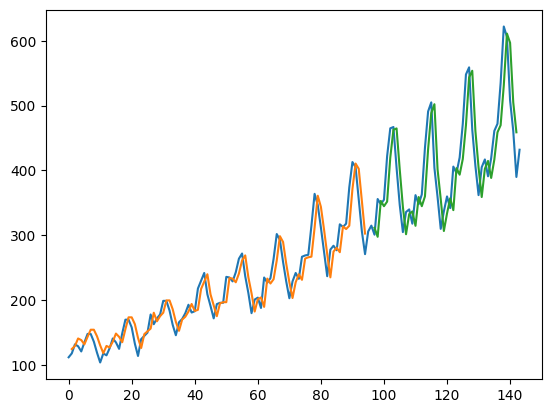

In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- You can see that the model has an average error of about 23 passengers (in thousands) on the training dataset and about 49 passengers (in thousands) on the test dataset. Not that bad.

### LSTM for Regression Using the Window Method

- You can also phrase the problem so that multiple, recent time steps can be used to make the prediction for the next time step.

- This is called a window, and the size of the window is a parameter that can be tuned for each problem.

- For example, given the current time (t) to predict the value at the next time in the sequence (t+1), you can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

- When phrased as a regression problem, the input variables are t-2, t-1, and t, and the output variable is t+1.

- The create_dataset() function created in the previous section allows you to create this formulation of the time series problem by increasing the look_back argument from 1 to 3.

- You can re-run the example in the previous section with the larger window size. The whole code listing with just the window size change is listed below for completeness.

Epoch 1/100
92/92 - 2s - loss: 0.0427 - 2s/epoch - 20ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0165 - 144ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0113 - 125ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0099 - 125ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0087 - 127ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0077 - 163ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0068 - 134ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0061 - 130ms/epoch - 1ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0054 - 127ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0049 - 151ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0047 - 127ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0044 - 168ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0043 - 147ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0042 - 134ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0041 - 146ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0039 - 144ms/epoc

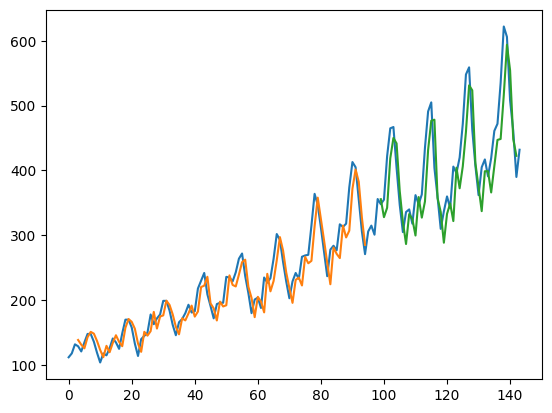

In [26]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM for Regression with Time Steps

- You may have noticed that the data preparation for the LSTM network includes time steps.

- Some sequence problems may have a varied number of time steps per sample. For example, you may have measurements of a physical machine leading up to the point of failure or a point of surge. Each incident would be a sample of observations that lead up to the event, which would be the time steps, and the variables observed would be the features.

- Time steps provide another way to phrase your time series problem. Like above in the window example, you can take prior time steps in your time series as inputs to predict the output at the next time step.

- Instead of phrasing the past observations as separate input features, you can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

- You can do this using the same data representation as in the previous window-based example, except when you reshape the data, you set the columns to be the time steps dimension and change the features dimension back to 1. For example:


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

- The entire code listing is provided below for completeness.

Epoch 1/100
92/92 - 2s - loss: 0.0341 - 2s/epoch - 19ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0129 - 216ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0107 - 175ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0090 - 243ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0075 - 200ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0064 - 171ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0055 - 175ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0049 - 166ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0043 - 187ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0040 - 181ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0039 - 177ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0039 - 219ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0038 - 208ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0039 - 198ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0038 - 191ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0037 - 151ms/epoc

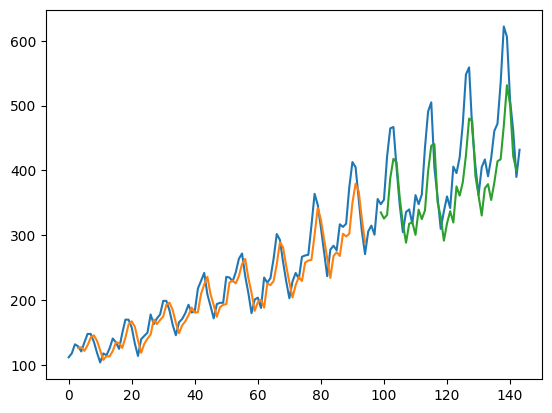

In [28]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- You can see that the results are slightly better than the previous example, although the structure of the input data makes a lot more sense.

### LSTM with Memory Between Batches

- The LSTM network has memory capable of remembering across long sequences.

- Normally, the state within the network is reset after each training batch when fitting the model, as well as each call to model.predict() or model.evaluate().

- You can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer “stateful.” This means it can build a state over the entire training sequence and even maintain that state if needed to make predictions.

- It requires that the training data not be shuffled when fitting the network. It also requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset_states(). This means that you must create your own outer loop of epochs and within each epoch call model.fit() and model.reset_states(). For example: 

In [ ]:
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

- Finally, when the LSTM layer is constructed, the stateful parameter must be set to True. Instead of specifying the input dimensions, you must hard code the number of samples in a batch, the number of time steps in a sample, and the number of features in a time step by setting the batch_input_shape parameter. For example:

In [ ]:
model.add(LSTM(4, batch_input_shape=(batch_size, time_steps, features), stateful=True))

- This same batch size must then be used later when evaluating the model and making predictions. For example:

In [ ]:
model.predict(trainX, batch_size=batch_size)

- You can adapt the previous time step example to use a stateful LSTM. The full code listing is provided below.

92/92 - 2s - loss: 0.0036 - 2s/epoch - 20ms/step
92/92 - 0s - loss: 0.0094 - 153ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0064 - 206ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0054 - 176ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0049 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 186ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0045 - 156ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 148ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0042 - 174ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0041 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0041 - 190ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 174ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 170ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 187ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 150ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0038 - 159ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0038 - 151ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0038 - 157ms

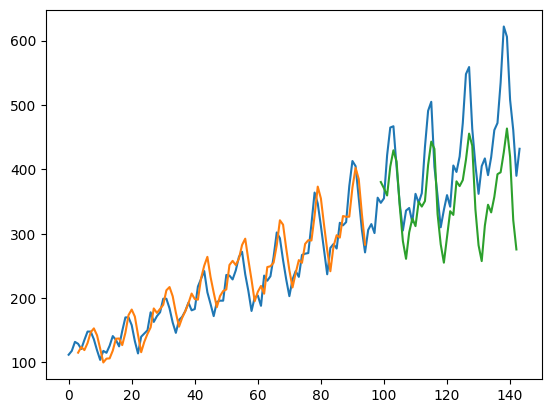

In [29]:
# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- You do see that results are better than some, worse than others. The model may need more modules and may need to be trained for more epochs to internalize the structure of the problem.

### Stacked LSTMs with Memory Between Batches

- Finally, let’s take a look at one of the big benefits of LSTMs: the fact that they can be successfully trained when stacked into deep network architectures.

- LSTM networks can be stacked in Keras in the same way that other layer types can be stacked. One addition to the configuration that is required is that an LSTM layer prior to each subsequent LSTM layer must return the sequence. This can be done by setting the return_sequences parameter on the layer to True.

92/92 - 5s - loss: 0.0055 - 5s/epoch - 52ms/step
92/92 - 0s - loss: 0.0160 - 274ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0126 - 303ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0096 - 284ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0075 - 262ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0063 - 296ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0058 - 268ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 271ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 278ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 277ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 258ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 304ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 293ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 307ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 313ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 279ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 251ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 327ms/epoch - 4ms/step
92/92 - 0s - loss: 0.0054 - 274ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0054 - 298ms

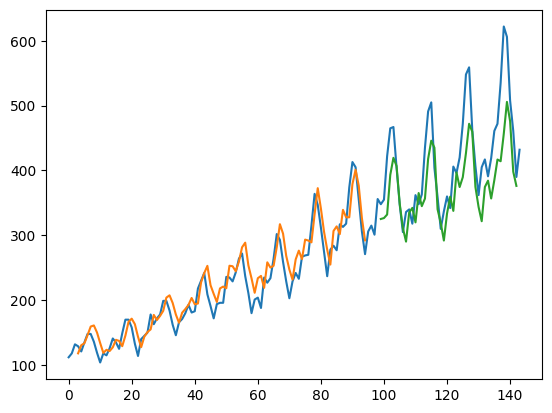

In [30]:
# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- The predictions on the test dataset are again worse. This is more evidence to suggest the need for additional training epochs.

### Time Series Forecasting with the Long Short-Term Memory Network in Python

####  Shampoo Sales Dataset

- This dataset describes the monthly number of sales of shampoo over a 3-year period.

- The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).


C:\Users\MaJiD\AppData\Local\Temp\ipykernel_18288\4007604454.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


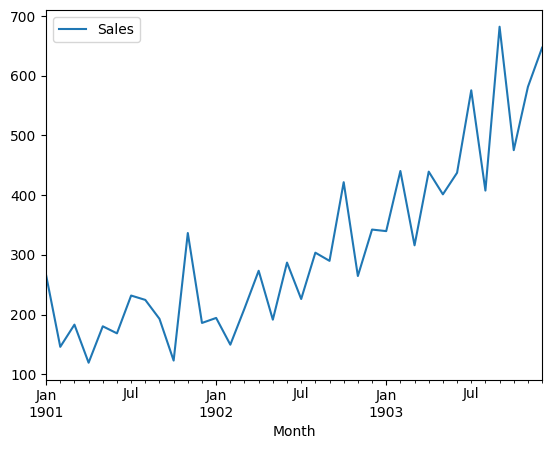

In [41]:
# load and plot dataset
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

### Experimental Test Setup

- We will split the Shampoo Sales dataset into two parts: a training and a test set.

- The first two years of data will be taken for the training dataset and the remaining one year of data will be used for the test set.

In [42]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

- Models will be developed using the training dataset and will make predictions on the test dataset.

- A rolling forecast scenario will be used, also called walk-forward model validation.

- Each time step of the test dataset will be walked one at a time. A model will be used to make a forecast for the time step, then the actual expected value from the test set will be taken and made available to the model for the forecast on the next time step.

- Finally, all forecasts on the test dataset will be collected and an error score calculated to summarize the skill of the model. The root mean squared error (RMSE) will be used as it punishes large errors and results in a score that is in the same units as the forecast data, namely monthly shampoo sales.

### Persistence Model Forecast

- A good baseline forecast for a time series with a linear increasing trend is a persistence forecast.

- The persistence forecast is where the observation from the prior time step (t-1) is used to predict the observation at the current time step (t).

- We can implement this by taking the last observation from the training data and history accumulated by walk-forward validation and using that to predict the current time step.

RMSE: 136.761


C:\Users\MaJiD\AppData\Local\Temp\ipykernel_18288\2793021958.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


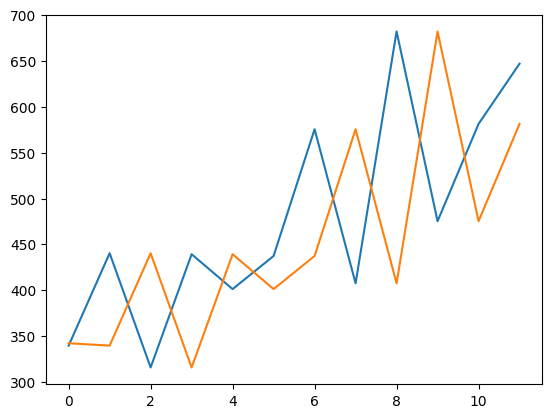

In [46]:
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

- Running the example prints the RMSE of about 136 monthly shampoo sales for the forecasts on the test dataset.

### LSTM Data Preparation

Before we can fit an LSTM model to the dataset, we must transform the data.

This section is broken down into three steps:

    Transform the time series into a supervised learning problem
    Transform the time series data so that it is stationary.
    Transform the observations to have a specific scale.

Transform Time Series to Supervised Learning

The LSTM model in Keras assumes that your data is divided into input (X) and output (y) components.

For a time series problem, we can achieve this by using the observation from the last time step (t-1) as the input and the observation at the current time step (t) as the output.

We can achieve this using the shift() function in Pandas that will push all values in a series down by a specified number places. We require a shift of 1 place, which will become the input variables. The time series as it stands will be the output variables.

We can then concatenate these two series together to create a DataFrame ready for supervised learning. The pushed-down series will have a new position at the top with no value. A NaN (not a number) value will be used in this position. We will replace these NaN values with 0 values, which the LSTM model will have to learn as “the start of the series” or “I have no data here,” as a month with zero sales on this dataset has not been observed.


In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

- We can test this function with our loaded Shampoo Sales dataset and convert it into a supervised learning problem.

In [48]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0      0
0    0.0  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


C:\Users\MaJiD\AppData\Local\Temp\ipykernel_18288\4293329689.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


### Transform Time Series to Stationary

The Shampoo Sales dataset is not stationary.

This means that there is a structure in the data that is dependent on the time. Specifically, there is an increasing trend in the data.

Stationary data is easier to model and will very likely result in more skillful forecasts.

The trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score.

A standard way to remove a trend is by differencing the data. That is the observation from the previous time step (t-1) is subtracted from the current observation (t). This removes the trend and we are left with a difference series, or the changes to the observations from one time step to the next.

We can achieve this automatically using the diff() function in pandas. Alternatively, we can get finer grained control and write our own function to do this, which is preferred for its flexibility in this case.

Below is a function called difference() that calculates a differenced series. Note that the first observation in the series is skipped as there is no prior observation with which to calculate a differenced value.

We also need to invert this process in order to take forecasts made on the differenced series back into their original scale.

The function below, called inverse_difference(), inverts this operation.

In [ ]:
from pandas import read_csv
from datetime import datetime
from pandas import Series

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(series, differenced[i], len(series)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

### Transform Time Series to Scale

Like other neural networks, LSTMs expect data to be within the scale of the activation function used by the network.

The default activation function for LSTMs is the hyperbolic tangent (tanh), which outputs values between -1 and 1. This is the preferred range for the time series data.

To make the experiment fair, the scaling coefficients (min and max) values must be calculated on the training dataset and applied to scale the test dataset and any forecasts. This is to avoid contaminating the experiment with knowledge from the test dataset, which might give the model a small edge.

We can transform the dataset to the range [-1, 1] using the MinMaxScaler class. Like other scikit-learn transform classes, it requires data provided in a matrix format with rows and columns. Therefore, we must reshape our NumPy arrays before transforming.

Again, we must invert the scale on forecasts to return the values back to the original scale so that the results can be interpreted and a comparable error score can be calculated.

In [ ]:
from pandas import read_csv
from datetime import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

### LSTM Model Development

The Long Short-Term Memory network (LSTM) is a type of Recurrent Neural Network (RNN).

A benefit of this type of network is that it can learn and remember over long sequences and does not rely on a pre-specified window lagged observation as input.

In Keras, this is referred to as stateful, and involves setting the “stateful” argument to “True” when defining an LSTM layer.

By default, an LSTM layer in Keras maintains state between data within one batch. A batch of data is a fixed-sized number of rows from the training dataset that defines how many patterns to process before updating the weights of the network. State in the LSTM layer between batches is cleared by default, therefore we must make the LSTM stateful. This gives us fine-grained control over when state of the LSTM layer is cleared, by calling the reset_states() function.

The LSTM layer expects input to be in a matrix with the dimensions: [samples, time steps, features].

    Samples: These are independent observations from the domain, typically rows of data.
    Time steps: These are separate time steps of a given variable for a given observation.
    Features: These are separate measures observed at the time of observation.

We have some flexibility in how the Shampoo Sales dataset is framed for the network. We will keep it simple and frame the problem as each time step in the original sequence is one separate sample, with one timestep and one feature.

Given that the training dataset is defined as X inputs and y outputs, it must be reshaped into the Samples/TimeSteps/Features format, for example:

In [ ]:
X, y = train[:, 0:-1], train[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])

The shape of the input data must be specified in the LSTM layer using the “batch_input_shape” argument as a tuple that specifies the expected number of observations to read each batch, the number of time steps, and the number of features.

The batch size is often much smaller than the total number of samples. It, along with the number of epochs, defines how quickly the network learns the data (how often the weights are updated).

The final import parameter in defining the LSTM layer is the number of neurons, also called the number of memory units or blocks. This is a reasonably simple problem and a number between 1 and 5 should be sufficient.

The line below creates a single LSTM hidden layer that also specifies the expectations of the input layer via the “batch_input_shape” argument.

In [ ]:
layer = LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True)

The network requires a single neuron in the output layer with a linear activation to predict the number of shampoo sales at the next time step.

Once the network is specified, it must be compiled into an efficient symbolic representation using a backend mathematical library, such as TensorFlow or Theano.

In compiling the network, we must specify a loss function and optimization algorithm. We will use “mean_squared_error” as the loss function as it closely matches RMSE that we will are interested in, and the efficient ADAM optimization algorithm.

Using the Sequential Keras API to define the network, the below snippet creates and compiles the network.

In [ ]:
model = Sequential()
model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Once compiled, it can be fit to the training data. Because the network is stateful, we must control when the internal state is reset. Therefore, we must manually manage the training process one epoch at a time across the desired number of epochs.

By default, the samples within an epoch are shuffled prior to being exposed to the network. Again, this is undesirable for the LSTM because we want the network to build up state as it learns across the sequence of observations. We can disable the shuffling of samples by setting “shuffle” to “False“.

Also by default, the network reports a lot of debug information about the learning progress and skill of the model at the end of each epoch. We can disable this by setting the “verbose” argument to the level of “0“.

We can then reset the internal state at the end of the training epoch, ready for the next training iteration.

Below is a loop that manually fits the network to the training data.

In [ ]:
for i in range(nb_epoch):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
	model.reset_states()

Putting this all together, we can define a function called fit_lstm() that trains and returns an LSTM model. As arguments, it takes the training dataset in a supervised learning format, a batch size, a number of epochs, and a number of neurons.

In [ ]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

The batch_size must be set to 1. This is because it must be a factor of the size of the training and test datasets.

The predict() function on the model is also constrained by the batch size; there it must be set to 1 because we are interested in making one-step forecasts on the test data.

We will not tune the network parameters in this tutorial; instead we will use the following configuration, found with a little trial and error:

    Batch Size: 1
    Epochs: 3000
    Neurons: 4

As an extension to this tutorial, you might like to explore different model parameters and see if you can improve performance.

### LSTM Forecast

Once the LSTM model is fit to the training data, it can be used to make forecasts.

Again, we have some flexibility. We can decide to fit the model once on all of the training data, then predict each new time step one at a time from the test data (we’ll call this the fixed approach), or we can re-fit the model or update the model each time step of the test data as new observations from the test data are made available (we’ll call this the dynamic approach).

In this tutorial, we will go with the fixed approach for its simplicity, although, we would expect the dynamic approach to result in better model skill.

To make a forecast, we can call the predict() function on the model. This requires a 3D NumPy array input as an argument. In this case, it will be an array of one value, the observation at the previous time step.

The predict() function returns an array of predictions, one for each input row provided. Because we are providing a single input, the output will be a 2D NumPy array with one value.

We can capture this behavior in a function named forecast() listed below. Given a fit model, a batch-size used when fitting the model (e.g. 1), and a row from the test data, the function will separate out the input data from the test row, reshape it, and return the prediction as a single floating point value.

In [ ]:
def forecast(model, batch_size, row):
	X = row[0:-1]
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

During training, the internal state is reset after each epoch. While forecasting, we will not want to reset the internal state between forecasts. In fact, we would like the model to build up state as we forecast each time step in the test dataset.

This raises the question as to what would be a good initial state for the network prior to forecasting the test dataset.

In this tutorial, we will seed the state by making a prediction on all samples in the training dataset. In theory, the internal state should be set up ready to forecast the next time step.

We now have all of the pieces to fit an LSTM Network model for the Shampoo Sales dataset and evaluate its performance.

The complete example is listed below.

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

#### Develop a Robust Result

A difficulty with neural networks is that they give different results with different starting conditions.

One approach might be to fix the random number seed used by Keras to ensure the results are reproducible. Another approach would be to control for the random initial conditions using a different experimental setup.

We can repeat the experiment from the previous section multiple times, then take the average RMSE as an indication of how well the configuration would be expected to perform on unseen data on average.

This is often called multiple repeats or multiple restarts.

We can wrap the model fitting and walk-forward validation in a loop of fixed number of repeats. Each iteration the RMSE of the run can be recorded. We can then summarize the distribution of RMSE scores.

In [ ]:
# repeat experiment
repeats = 30
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)

The data preparation would be the same as before.

We will use 30 repeats as that is sufficient to provide a good distribution of RMSE scores.

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# repeat experiment
repeats = 30
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)

# summarize results
results = DataFrame()
results['rmse'] = error_scores
print(results.describe())
results.boxplot()
pyplot.show()

We can see that the mean and standard deviation RMSE scores are 138.491905 and 46.313783 monthly shampoo sales respectively.

This is a very useful result as it suggests the result reported above was probably a statistical fluke. The experiment suggests that the model is probably about as good as the persistence model on average (136.761), if not slightly worse.

### some better examples using LSTMs on time series with:

- LSTMs for Multivariate Time Series Forecasting

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

- LSTMs for Multi-Step Time Series Forecasting

https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/

## There are many extensions to this tutorial that we may consider.

Perhaps you could explore some of these yourself and post your discoveries in the comments below.

    - Multi-Step Forecast. The experimental setup could be changed to predict the next n-time steps rather than the next single time step. This would also permit a larger batch size and faster training. Note that we are basically performing a type of 12 one-step forecast in this tutorial given the model is not updated, although new observations are available and are used as input variables.
    - Tune LSTM model. The model was not tuned; instead, the configuration was found with some quick trial and error. I believe much better results could be achieved by tuning at least the number of neurons and number of training epochs. I also think early stopping via a callback might be useful during training.
    - Seed State Experiments. It is not clear whether seeding the system prior to forecasting by predicting all of the training data is beneficial. It seems like a good idea in theory, but this needs to be demonstrated. Also, perhaps other methods of seeding the model prior to forecasting would be beneficial.
    - Update Model. The model could be updated in each time step of the walk-forward validation. Experiments are needed to determine if it would be better to refit the model from scratch or update the weights with a few more training epochs including the new sample.
    - Input Time Steps. The LSTM input supports multiple time steps for a sample. Experiments are needed to see if including lag observations as time steps provides any benefit.
    - Input Lag Features. Lag observations may be included as input features. Experiments are needed to see if including lag features provide any benefit, not unlike an AR(k) linear model.
    - Input Error Series. An error series may be constructed (forecast error from a persistence model) and used as an additional input feature, not unlike an MA(k) linear model. Experiments are needed to see if this provides any benefit.
    - Learn Non-Stationary. The LSTM network may be able to learn the trend in the data and make reasonable predictions. Experiments are needed to see if temporal dependent structures, like trends and seasonality, left in data can be learned and effectively predicted by LSTMs.
    - Contrast Stateless. Stateful LSTMs were used in this tutorial. The results should be compared with stateless LSTM configurations.
    - Statistical Significance. The multiple repeats experimental protocol can be extended further to include statistical significance tests to demonstrate whether the difference between populations of RMSE results with different configurations are statistically significant.
